# **Tarea Nº 4**
Scope: APIs

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Viernes 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Nestor Canales / Adriana Torres ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

The Central Bank Reserve of Perú (BCRP) holds a list of datasets that are among the most comprehensive for macroeconomic purposes. In this exercise, we'll retrieve data from the [BCRP API](https://estadisticas.bcrp.gob.pe/estadisticas/series/ayuda/api) and explore the impact of pandemics

## Before starting

- You must pull the necessary data using `get` and `requests`
- You are required to apply the concepts learned in the previous sessions (`pandas`, `if`, `loop`, `function`)
- Hint: here is the BCRP url structure for the APIs call:
```html
https://estadisticas.bcrp.gob.pe/estadisticas/series/api/[códigos de series]/[formato de salida]/[periodo inicial]/[periodo final]/[idioma]
```

## The very long run

1. Locate the "Estadísticas de 100 años del BCRP" section in the BCRP´s series data statistics [here](https://estadisticas.bcrp.gob.pe/estadisticas/series/index) and identify the necessary code for the serie **`PBI (Mill S/ 2007)`**. Later, add manually the annual GDP values for 2022 and 2023 (be careful with the units of data). Then, **calculate** the Peruvian annual GDP growth (%) since 1922 to 2023. Finally, plot it using a very simple graph through `matplotlib` and provide critical insights (no more than 100 words)

    Hint1: use `.json()` for exploring the `content`. Your data is inside `["periods"]`
    
    Hint2: the graph must looks something like this: <img src="growth_gdp_long_run.png" max-width="300">
    

In [7]:
# Solution
import requests
response1 = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PD39552DA/json/1922/2021")
status_code1 = response1.status_code
status_code1 # Si tiene un valor de 200 significa que no hay problemas en conectar con el server.

200

In [8]:
response1.json()

{'config': {'title': 'PBI Sectorial',
  'series': [{'name': 'PBI Sectorial - PBI (Var.%)', 'dec': '2'}]},
 'periods': [{'name': '1922', 'values': ['5.0729656158704']},
  {'name': '1923', 'values': ['4.49074992490569']},
  {'name': '1924', 'values': ['8.90188453818352']},
  {'name': '1925', 'values': ['3.14503419077236']},
  {'name': '1926', 'values': ['9.38144740696487']},
  {'name': '1927', 'values': ['3.06884366977354']},
  {'name': '1928', 'values': ['5.37128980577405']},
  {'name': '1929', 'values': ['12.5901916131793']},
  {'name': '1930', 'values': ['-9.49378571993242']},
  {'name': '1931', 'values': ['-6.60573484082909']},
  {'name': '1932', 'values': ['-3.25061969031152']},
  {'name': '1933', 'values': ['10.7601785436389']},
  {'name': '1934', 'values': ['12.7040813671012']},
  {'name': '1935', 'values': ['8.85232604830794']},
  {'name': '1936', 'values': ['4.81434996118963']},
  {'name': '1937', 'values': ['1.9379182894299']},
  {'name': '1938', 'values': ['2.00597873801003']}

In [9]:
response2 = requests.get("https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01728AM/json/2022/2023") # La data de 2023 se encuentra incompleta, por eso la obvio.
status_code2 = response2.status_code
status_code2

200

In [10]:
response2.json()

{'config': {'title': 'Producto bruto interno y demanda interna (variaciones porcentuales anualizadas)',
  'series': [{'name': 'Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - PBI',
    'dec': '1'}]},
 'periods': [{'name': 'Ene.2022', 'values': ['2.76349432316665']},
  {'name': 'Feb.2022', 'values': ['4.70291294109833']},
  {'name': 'Mar.2022', 'values': ['3.83830111073661']},
  {'name': 'Abr.2022', 'values': ['4.00212973664761']},
  {'name': 'May.2022', 'values': ['2.61019336189649']},
  {'name': 'Jun.2022', 'values': ['3.47478980814159']},
  {'name': 'Jul.2022', 'values': ['1.8025721283913']},
  {'name': 'Ago.2022', 'values': ['1.97427453328511']},
  {'name': 'Sep.2022', 'values': ['2.13997812996818']},
  {'name': 'Oct.2022', 'values': ['2.3335148356285']},
  {'name': 'Nov.2022', 'values': ['2.12160068474319']},
  {'name': 'Dic.2022', 'values': ['1.04248993191112']}]}

In [11]:
# Obtén los datos JSON de ambas respuestas
data1 = response1.json()
data2 = response2.json()

# Calcula el promedio de la variación porcentual del PBI en response2
variation_values_2022 = [float(period["values"][0]) for period in data2["periods"]]
average_variation_2022 = sum(variation_values_2022) / len(variation_values_2022)

# Crea una nueva estructura de datos llamada data3 basada en data1 y agrega el promedio para el año 2022
data3 = {
    "config": data1["config"],
    "periods": data1["periods"] + [{"name": "2022", "values": [str(average_variation_2022)]}]
}

data3

{'config': {'title': 'PBI Sectorial',
  'series': [{'name': 'PBI Sectorial - PBI (Var.%)', 'dec': '2'}]},
 'periods': [{'name': '1922', 'values': ['5.0729656158704']},
  {'name': '1923', 'values': ['4.49074992490569']},
  {'name': '1924', 'values': ['8.90188453818352']},
  {'name': '1925', 'values': ['3.14503419077236']},
  {'name': '1926', 'values': ['9.38144740696487']},
  {'name': '1927', 'values': ['3.06884366977354']},
  {'name': '1928', 'values': ['5.37128980577405']},
  {'name': '1929', 'values': ['12.5901916131793']},
  {'name': '1930', 'values': ['-9.49378571993242']},
  {'name': '1931', 'values': ['-6.60573484082909']},
  {'name': '1932', 'values': ['-3.25061969031152']},
  {'name': '1933', 'values': ['10.7601785436389']},
  {'name': '1934', 'values': ['12.7040813671012']},
  {'name': '1935', 'values': ['8.85232604830794']},
  {'name': '1936', 'values': ['4.81434996118963']},
  {'name': '1937', 'values': ['1.9379182894299']},
  {'name': '1938', 'values': ['2.00597873801003']}

In [12]:
# Añade la estimación para el año 2023 en data4 (Ese valor se encuentra en este link: https://www.bcrp.gob.pe/docs/Publicaciones/Reporte-Inflacion/2023/diciembre/reporte-de-inflacion-diciembre-2023-presentacion.pdf)
data4 = {
    "config": data3["config"],
    "periods": data3["periods"] + [{"name": "2023", "values": ["-0.5"]}]
}

# Muestra la estructura de datos resultante llamada data4
data4

{'config': {'title': 'PBI Sectorial',
  'series': [{'name': 'PBI Sectorial - PBI (Var.%)', 'dec': '2'}]},
 'periods': [{'name': '1922', 'values': ['5.0729656158704']},
  {'name': '1923', 'values': ['4.49074992490569']},
  {'name': '1924', 'values': ['8.90188453818352']},
  {'name': '1925', 'values': ['3.14503419077236']},
  {'name': '1926', 'values': ['9.38144740696487']},
  {'name': '1927', 'values': ['3.06884366977354']},
  {'name': '1928', 'values': ['5.37128980577405']},
  {'name': '1929', 'values': ['12.5901916131793']},
  {'name': '1930', 'values': ['-9.49378571993242']},
  {'name': '1931', 'values': ['-6.60573484082909']},
  {'name': '1932', 'values': ['-3.25061969031152']},
  {'name': '1933', 'values': ['10.7601785436389']},
  {'name': '1934', 'values': ['12.7040813671012']},
  {'name': '1935', 'values': ['8.85232604830794']},
  {'name': '1936', 'values': ['4.81434996118963']},
  {'name': '1937', 'values': ['1.9379182894299']},
  {'name': '1938', 'values': ['2.00597873801003']}

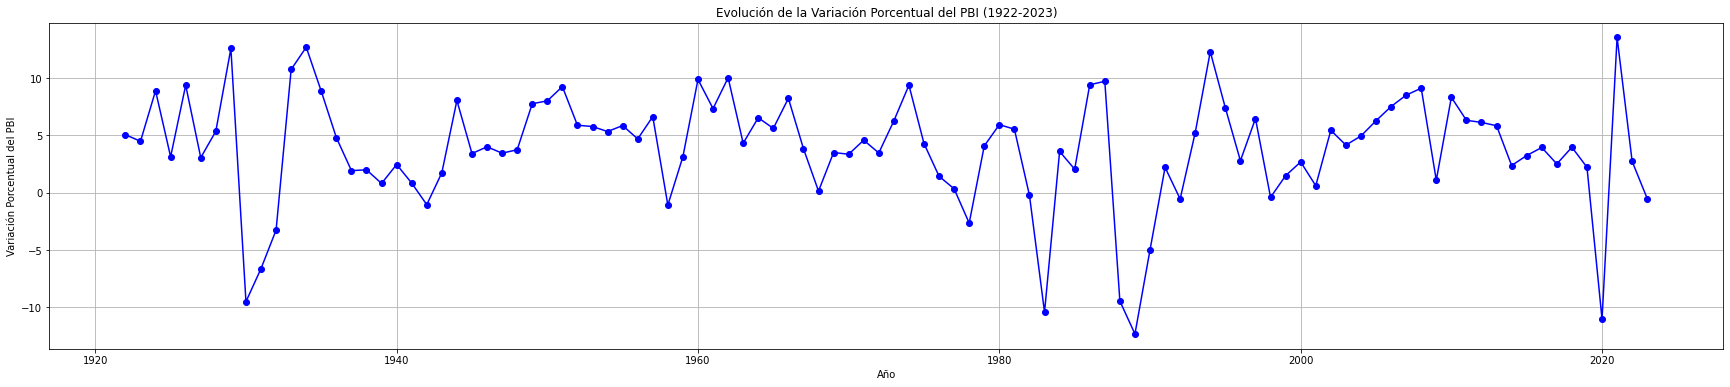

In [13]:
import matplotlib.pyplot as plt
# Crea listas para almacenar los años y las variaciones porcentuales
years = [int(period["name"]) for period in data4["periods"]]
variations = [float(period["values"][0]) for period in data4["periods"]]

# Grafica la evolución de la variación porcentual a lo largo de los años
plt.figure(figsize=(30, 6))
plt.plot(years, variations, marker='o', linestyle='-', color='b')
plt.title('Evolución de la Variación Porcentual del PBI (1922-2023)')
plt.xlabel('Año')
plt.ylabel('Variación Porcentual del PBI')
plt.grid(True)
plt.show()

## The hitman

2. Retrieve the up-to-date data for the monthly GDP in index (2007=100) from this [link](https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/producto-bruto-interno-y-demanda-interna-variaciones-indice-2007). Then, calculate the the 5-year average monthly growth previous to the pandemics (ending in Feb-2020) for the 12-month rolling mean of the index, and project the alternative scenario of the Peruvian economy without the COVID-19. Then plot them out and provide insight from the gap between the real data and the pre-pandemic trend.

    Hint1: You may use the regression type of your election, but the OLS is recommended. 
    
    Hint2: Your plot should look somethig like this. You aren´t required to add flags/annotations/texts inside the graph <img src="growth_gdp_pandemics.png" max-width="300">

    Hint3: For more details about calculation, review this post from [The Economist](https://www.economist.com/graphic-detail/2021/10/28/americas-post-covid-economic-recovery-suffers-a-setback)
    


In [14]:
# Solution
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [15]:
#Vemos la serie en general
import pandas as pd 
URL ='https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01770AM/html'
BCRP = pd.read_html(URL) 
serie_general=BCRP[1]
serie_general #lo visualizamos

,Fecha,Producto bruto interno y demanda interna (índice 2007=100) - PBI
0,Ene03,73.2
1,Feb03,71.1
2,Mar03,74.3
3,Abr03,80.7
4,May03,83.2
...,...,...
245,Jun23,177.3
246,Jul23,175.5
247,Ago23,178.1
248,Sep23,180.0


In [16]:
#Vemos la serie pre pandemia
#OJO: se va hasta la 207 para que tome en consideración la columna 206 (dic-2019)
serie_prepandemia = serie_general[145:207].copy()  
#se añade una columna "tiempo"
serie_prepandemia.loc[:, 'Tiempo'] = range(1, len(serie_prepandemia) + 1)
#Reiniciamos los índices del DataFrame:
serie_prepandemia = serie_prepandemia.reset_index(drop=True)

In [17]:
#serie contrafactual
serie_prepandemia_contrafactual=serie_general[145:251].copy()  
#se añade una columna "tiempo"
serie_prepandemia_contrafactual.loc[:, 'Tiempo'] = range(1, len(serie_prepandemia_contrafactual) + 1)
#Reiniciamos los índices del DataFrame:
serie_prepandemia_contrafactual = serie_prepandemia_contrafactual.reset_index(drop=True)

#hallamos el logaritmo para ajustar los datos por estacionalidad
# Calculamos el crecimiento mensual de la serie
serie_prepandemia_contrafactual['Log_PBI'] = np.log1p(serie_prepandemia_contrafactual['Producto bruto interno y demanda interna (índice 2007=100) - PBI'])
serie_prepandemia_contrafactual #lo visualizamos
# Implementamos una media móvil con ventana de 12 meses para suavizar las fluctuaciones
serie_prepandemia['Crecimiento mensual'] = serie_prepandemia['Producto bruto interno y demanda interna (índice 2007=100) - PBI'].pct_change() * 100
#Implementamos una media móvil con ventana de 12 meses para suavizar las fluctuaciones
serie_prepandemia['Media_movil'] = serie_prepandemia['Crecimiento mensual'].rolling(window=12).mean()
serie_prepandemia # Visualizamos el resultado en el DataFrame

,Fecha,Producto bruto interno y demanda interna (índice 2007=100) - PBI,Tiempo,Crecimiento mensual,Media_movil
0,Feb15,137.5,1,NaN,NaN
1,Mar15,148.3,2,7.854545,NaN
2,Abr15,152.0,3,2.494943,NaN
3,May15,150.2,4,-1.184211,NaN
4,Jun15,150.6,5,0.266312,NaN
...,...,...,...,...,...
57,Nov19,174.2,58,-1.191151,0.392502
58,Dic19,189.6,59,8.840413,0.296849
59,Ene20,162.4,60,-14.345992,0.436820
60,Feb20,161.8,61,-0.369458,0.543860


In [18]:
#Es ahí que iniciamos haciendo la regresion
regresion1 = sm.OLS(serie_prepandemia['Producto bruto interno y demanda interna (índice 2007=100) - PBI'], sm.add_constant(serie_prepandemia['Tiempo'])).fit()
serie_prepandemia['tendencia_anterior'] = regresion1.predict(sm.add_constant(serie_prepandemia['Tiempo'])) #Se calculan las predicciones de la tendencia anterior utilizando el modelo de regresión lineal y se almacenan en una nueva columna llamada 'tendencia_anterior'
regresion1.summary()

#Predicción de Futuros Índices de PBI (sin pandemia):
sin_pandemia = pd.DataFrame({'X': np.arange(1, 106)})
sin_pandemia['Y'] = regresion1.predict(sm.add_constant(sin_pandemia['X']))
#Se crea un nuevo DataFrame sin_pandemia que contiene una serie de valores para la variable independiente 'X' (posiblemente representando períodos futuros). 
#Luego, se calculan las predicciones correspondientes utilizando el modelo de regresión y se almacenan en la columna 'Y'.

#Finalmente calculamos el log para desestabilizar
sin_pandemia['Log_Y'] = np.log1p(sin_pandemia['Y'])
sin_pandemia

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,X,Y,Log_Y
0,1,150.239478,5.018865
1,2,150.604973,5.021278
2,3,150.970469,5.023686
3,4,151.335965,5.026088
4,5,151.701461,5.028485
...,...,...,...
100,101,186.789048,5.235319
101,102,187.154544,5.237264
102,103,187.520040,5.239204
103,104,187.885535,5.241141


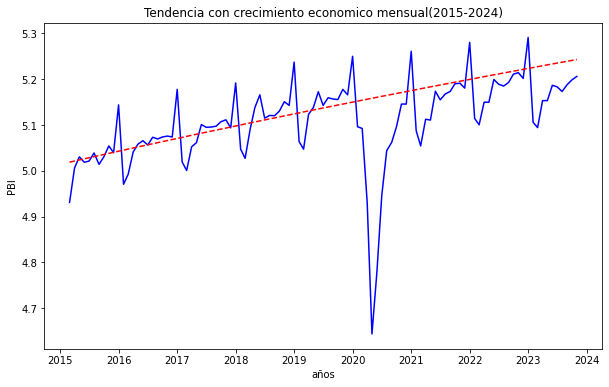

In [19]:
#Iniciamos a hacer el grafico
import matplotlib.dates as mdates
# Viendo la columna de "tiempo"
serie_prepandemia_contrafactual['Tiempo'] = pd.date_range(start='2015-02-01', periods=len(serie_prepandemia_contrafactual), freq='M')
sin_pandemia['X'] = pd.date_range(start='2015-02-01', periods=len(sin_pandemia), freq='M')
# Convertir 'Tiempo' y 'X' a objetos de fecha y hora
serie_prepandemia_contrafactual['Tiempo'] = pd.to_datetime(serie_prepandemia_contrafactual['Tiempo'])
sin_pandemia['X'] = pd.to_datetime(sin_pandemia['X'])

#Comparamos
plt.figure(figsize=(10, 6))
plt.plot(serie_prepandemia_contrafactual['Tiempo'], serie_prepandemia_contrafactual['Log_PBI'], label='PBI', color='blue')
plt.plot(sin_pandemia['X'], sin_pandemia['Log_Y'], label='Tendencia anerior a la etapa de pandemia(OLS)', linestyle='--', color='red')

# Formatea el eje x para mostrar las fechas
axes = plt.gca()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.set_title('Tendencia con crecimiento economico mensual(2015-2024)')

#Finalmente, tenemos el gráfico
plt.xlabel('años')
plt.ylabel('PBI')
plt.show()

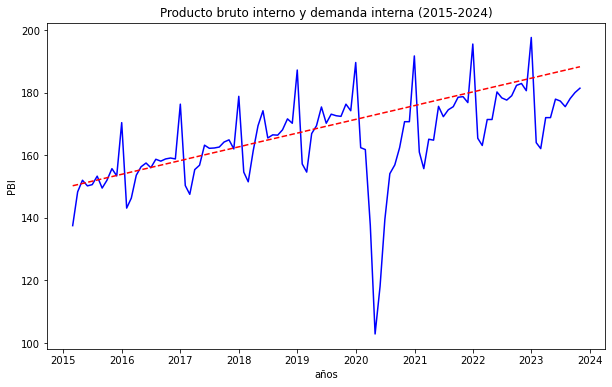

In [20]:
#Lo vemos por años:
import matplotlib.dates as mdates
serie_prepandemia_contrafactual['Tiempo'] = pd.date_range(start='2015-02-01', periods=len(serie_prepandemia_contrafactual), freq='M')
sin_pandemia['X'] = pd.date_range(start='2015-02-01', periods=len(sin_pandemia), freq='M')

#comparamos
plt.figure(figsize=(10, 6))
plt.plot(serie_prepandemia_contrafactual['Tiempo'], serie_prepandemia_contrafactual['Producto bruto interno y demanda interna (índice 2007=100) - PBI'], label='PBI', color='blue')
plt.plot(sin_pandemia['X'], sin_pandemia['Y'], label='Tendencia anterior a la etapa de pandemia(OLS)', linestyle='--', color='red')

#Usando axes como alternativa
axes = plt.gca()
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.set_title('Producto bruto interno y demanda interna (2015-2024)')

plt.xlabel('años')
plt.ylabel('PBI')
plt.show()

## The winners

- Based on the [Nasdaq Stock Screener](https://www.nasdaq.com/market-activity/stocks/screener), identify the three largest companies in the three larger sectors defined by market cap
- Elaborate a list/dictionary/series (what ever you think is more suitable) containing all tickers (or symbols) and sectors from these companies.
- So far, you can download data from Nasdaq, web scrape it or copy it manually. It doesn´t matter
- Then, use `yfinance` library to retrieve the market data for all the 9 firms
- Construct a table with the most common *institucional holders* by sector. Is there any interesting pattern? Hint: loop the `institutional_holders` from `yfinance`
- Calculate the distribution of the daily percentage returns for the 3 larger companies (defined by market cap) along the last 5 years. Plot your results (feel free to find the most appealing way to represent them) and provide critical insights

$$
  percentage\_return_{t} = \frac{price_t-price_{t-1}}{price_t}*100+dividends (\%)
$$

- Hint1: you can find the `dividens` through the `yfinance`'s 
`Ticker()`
- Hint2: some firms may not be paying dividends

In [1]:
# Solution
import pandas as pd

# Especifica la ruta de tu archivo CSV
archivo_csv = "Total.csv"

# Carga el archivo CSV en un DataFrame de Pandas
dataset = pd.read_csv(archivo_csv)

# Muestra la información del dataset
dataset

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$130.54,0.8600,0.663%,3.824876e+10,United States,1999.0,1285220,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$30.03,-0.8500,-2.753%,5.359511e+09,United States,2016.0,3933523,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$1.06,0.0400,3.922%,3.351950e+07,China,2008.0,3883,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$10.90,0.0000,0.00%,0.000000e+00,United States,2021.0,144,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.0181,-0.0059,-24.583%,0.000000e+00,United States,2021.0,12035,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
7269,ZVRA,Zevra Therapeutics Inc. Common Stock,$5.92,-0.1100,-1.824%,2.144115e+08,United States,NaN,193146,Health Care,Biotechnology: Pharmaceutical Preparations
7270,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$0.7536,-0.0566,-6.986%,9.369490e+05,United States,2022.0,196778,Health Care,Biotechnology: Pharmaceutical Preparations
7271,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$28.15,0.1500,0.536%,4.864617e+09,United States,2012.0,674125,Industrials,Industrial Machinery/Components
7272,ZYME,Zymeworks Inc. Common Stock,$10.88,-0.0900,-0.82%,7.616216e+08,United States,NaN,223893,Health Care,Biotechnology: Pharmaceutical Preparations


In [2]:
# Agrupa por Sector y calcula la suma del Market Cap
suma_market_cap_por_sector = dataset.groupby('Sector')['Market Cap'].sum()

# Ordena en orden descendente
suma_market_cap_por_sector = suma_market_cap_por_sector.sort_values(ascending=False)

# Muestra el resultado
print(suma_market_cap_por_sector)

Sector
Technology                2.004903e+13
Consumer Discretionary    1.258947e+13
Finance                   8.295428e+12
Health Care               7.315398e+12
Industrials               5.120880e+12
Energy                    2.767254e+12
Consumer Staples          2.006206e+12
Utilities                 1.868108e+12
Telecommunications        1.674415e+12
Real Estate               1.619095e+12
Basic Materials           7.654549e+11
Miscellaneous             1.121257e+11
Name: Market Cap, dtype: float64


In [3]:
# Filtra el DataFrame para incluir solo los sectores Technology, Consumer Discretionary y Finance
sectores_interes = ['Technology', 'Consumer Discretionary', 'Finance']
dataset_filtrado = dataset[dataset['Sector'].isin(sectores_interes)]

# Agrupa por Sector y selecciona las tres empresas con el mayor Market Cap
top3_empresas_por_sector = dataset_filtrado.groupby('Sector', group_keys=False).apply(lambda x: x.nlargest(3, 'Market Cap'))

# Imprime el resultado con Symbol, Name y Market Cap
top3_empresas_por_sector[['Symbol', 'Name', 'Market Cap', 'Sector']]

,Symbol,Name,Market Cap,Sector
399,AMZN,Amazon.com Inc. Common Stock,1.597848e+12,Consumer Discretionary
6598,TSLA,Tesla Inc. Common Stock,6.958341e+11,Consumer Discretionary
6778,V,Visa Inc.,4.849227e+11,Consumer Discretionary
3191,HSBC,HSBC Holdings plc. Common Stock,7.755103e+11,Finance
3586,JPM,JP Morgan Chase & Co. Common Stock,4.887250e+11,Finance
727,BAC,Bank of America Corporation Common Stock,2.595704e+11,Finance
16,AAPL,Apple Inc. Common Stock,2.891568e+12,Technology
4348,MSFT,Microsoft Corporation Common Stock,2.887211e+12,Technology
2921,GOOG,Alphabet Inc. Class C Capital Stock,1.805308e+12,Technology


In [4]:
# Crear un diccionario con los símbolos y sectores
ticker_sector_dict = top3_empresas_por_sector.set_index('Symbol')['Sector'].to_dict()

# Imprimir el diccionario
print(ticker_sector_dict)

{'AMZN': 'Consumer Discretionary', 'TSLA': 'Consumer Discretionary', 'V': 'Consumer Discretionary', 'HSBC': 'Finance', 'JPM': 'Finance', 'BAC': 'Finance', 'AAPL': 'Technology', 'MSFT': 'Technology', 'GOOG': 'Technology'}


In [5]:
import yfinance as yf

# Lista de símbolos de las empresas
symbols = ['AMZN', 'TSLA', 'V', 'HSBC', 'JPM', 'BAC', 'AAPL', 'MSFT', 'GOOG']

# Crear un diccionario para almacenar los datos de mercado
market_data_dict = {}

# Recuperar los datos de mercado para cada símbolo
for symbol in symbols:
    stock_data = yf.download(symbol, start="2022-01-01", end="2024-01-01")
    market_data_dict[symbol] = stock_data

# Imprimir el diccionario de datos de mercado
for symbol, data in market_data_dict.items():
    print(f"\nDatos de mercado para {symbol}:\n{data}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Datos de mercado para AMZN:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  167.550003  170.703506  166.160507  170.404495  170.404495   
2022-01-04  170.438004  171.399994  166.349503  167.522003  167.522003   
2022-01-05  166.882996  167.126495  164.356995  164.356995  164.356995   
2022-01-06  163.450500  164.800003  161.936996  163.253998  163.253998   
2022-01-07  163.839005  165.243500  162.031006  162.554001  162.554001   
...                ...         ...         ...         ...         ...   
2023-12-22  153.770004  154.350006  152.710007  153.419998  153.419998   
2023-12-26  153.559998  153.979996  153.029999  153.410004  153.410004   
2023-12-27  153.559998  154.779999  153.119995  153.339996  153.339996   
2023-12-28  153.720001  154.080002  152.949997  153.380005  153.380005   
2023-12-29  153.100006  153.889999  151.029999  151.940002  151.940002   

        

In [6]:
# Crear un DataFrame vacío para almacenar la información de inversores institucionales
institutional_holders_df = pd.DataFrame(columns=['Symbol', 'Sector', 'Institutional Holder'])

# Recorrer los símbolos y obtener la información de inversores institucionales
for symbol in symbols:
    stock_info = yf.Ticker(symbol)
    holders = stock_info.institutional_holders
    sector = stock_info.info.get('industry', 'N/A')

    if holders is not None and not holders.empty:
        # Tomar el inversor institucional más común
        most_common_holder = holders['Holder'].value_counts().idxmax()

        # Agregar la información al DataFrame
        institutional_holders_df = institutional_holders_df.append({
            'Symbol': symbol,
            'Sector': sector,
            'Institutional Holder': most_common_holder
        }, ignore_index=True)

# Imprimir el DataFrame resultante
print("Tabla de los inversores institucionales más comunes por sector:")
print(institutional_holders_df)

C:\Users\Nestor\AppData\Local\Temp\ipykernel_4400\809371820.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  institutional_holders_df = institutional_holders_df.append({
C:\Users\Nestor\AppData\Local\Temp\ipykernel_4400\809371820.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  institutional_holders_df = institutional_holders_df.append({
C:\Users\Nestor\AppData\Local\Temp\ipykernel_4400\809371820.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  institutional_holders_df = institutional_holders_df.append({
C:\Users\Nestor\AppData\Local\Temp\ipykernel_4400\809371820.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  instituti

Tabla de los inversores institucionales más comunes por sector:
  Symbol                          Sector          Institutional Holder
0   AMZN                 Internet Retail            Vanguard Group Inc
1   TSLA              Auto Manufacturers            Vanguard Group Inc
2      V                 Credit Services            Vanguard Group Inc
3   HSBC             Banks - Diversified  Dimensional Fund Advisors LP
4    JPM             Banks - Diversified            Vanguard Group Inc
5    BAC             Banks - Diversified       Berkshire Hathaway, Inc
6   AAPL            Consumer Electronics            Vanguard Group Inc
7   MSFT       Software - Infrastructure            Vanguard Group Inc
8   GOOG  Internet Content & Information            Vanguard Group Inc


C:\Users\Nestor\AppData\Local\Temp\ipykernel_4400\809371820.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  institutional_holders_df = institutional_holders_df.append({


In [7]:
#Ya vimos la data en orden, ahora ese necesario para el análisis verlo desde los sectores más importantes:
#Para ver los 3 sectores más importantes:
df = pd.DataFrame(dataset, columns=['Symbol', 'Name', 'Last Sale','Market Cap','Country', 'IPO Year', 'Volume', 'Sector', 'Industry'])
market_cap = df.sort_values(by=['Sector', 'Market Cap'], ascending=False) #desdecendente
market_cap_largest_companies = market_cap.groupby('Sector').head(3) #por sector
sector_sizes = df.groupby('Sector')['Market Cap'].sum() #los sectores más importantes
largest_sectors = sector_sizes.nlargest(3)

# 4. Y para obtener las tres empresas más grandes en estos sectores:
largest_companies_sectors = market_cap_largest_companies[market_cap_largest_companies['Sector'].isin(largest_sectors.index)]
largest_companies_sectors

,Symbol,Name,Last Sale,Market Cap,Country,IPO Year,Volume,Sector,Industry
16,AAPL,Apple Inc. Common Stock,$185.92,2.891568e+12,United States,1980.0,40444634,Technology,Computer Manufacturing
4348,MSFT,Microsoft Corporation Common Stock,$388.47,2.887211e+12,United States,1986.0,21645563,Technology,Computer Software: Prepackaged Software
2921,GOOG,Alphabet Inc. Class C Capital Stock,$144.24,1.805308e+12,United States,2004.0,13995168,Technology,Computer Software: Programming Data Processing
3191,HSBC,HSBC Holdings plc. Common Stock,$39.38,7.755103e+11,United Kingdom,NaN,2626652,Finance,Savings Institutions
3586,JPM,JP Morgan Chase & Co. Common Stock,$169.05,4.887250e+11,United States,NaN,19429147,Finance,Major Banks
727,BAC,Bank of America Corporation Common Stock,$32.80,2.595704e+11,United States,NaN,74316635,Finance,Major Banks
399,AMZN,Amazon.com Inc. Common Stock,$154.62,1.597848e+12,United States,1997.0,40460184,Consumer Discretionary,Catalog/Specialty Distribution
6598,TSLA,Tesla Inc. Common Stock,$218.89,6.958341e+11,United States,2010.0,122790258,Consumer Discretionary,Auto Manufacturing
6778,V,Visa Inc.,$264.17,4.849227e+11,United States,NaN,4656070,Consumer Discretionary,Business Services


In [9]:
#estos son los 3 mercados con mayor capitalizacion de mercado
aapl=yf.Ticker('AAPL')
msft=yf.Ticker('MSFT')
goog=yf.Ticker('GOOG')

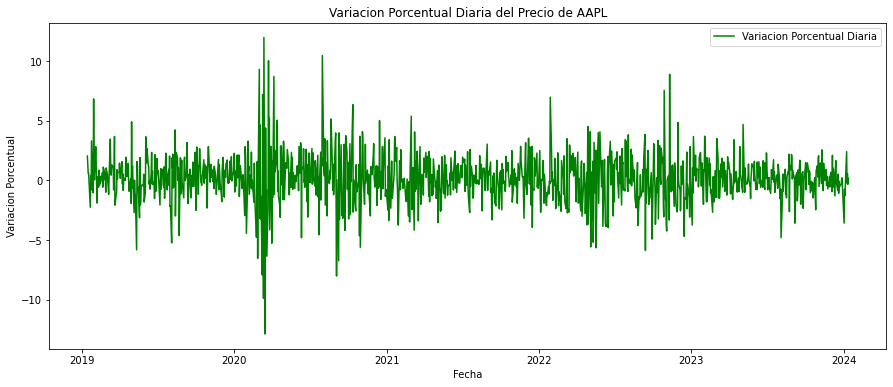

In [11]:
#Analicemos la variacion porcentual diaria de AAPL
aapl_h=aapl.history("5y")
#Cálculo de la variación porcentual diaria con dividendos:
aapl_h['Retorno Porcentual'] = ((aapl_h['Close'] - aapl_h['Close'].shift(1)) / aapl_h['Close'].shift(1) * 100) + aapl_h['Dividends']
aapl_h

#empezamos a graficar
plt.figure(figsize=(15, 6))
plt.plot(aapl_h.index, aapl_h['Retorno Porcentual'], label='Variacion Porcentual Diaria', color='green')
plt.title('Variacion Porcentual Diaria del Precio de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Variacion Porcentual')
plt.legend()
plt.show()

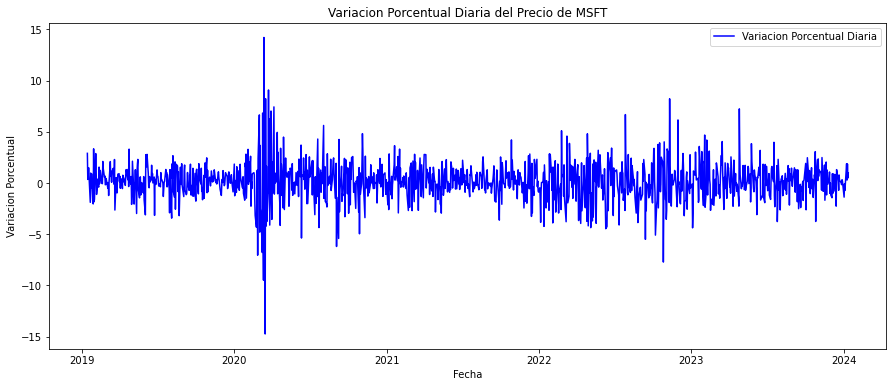

In [12]:
#Analicemos la variacion porcentual diaria de MSFT
msft_h=msft.history("5y")
#Cálculo de la variación porcentual diaria con dividendos:
msft_h['Retorno Porcentual'] = ((msft_h['Close'] - msft_h['Close'].shift(1)) / msft_h['Close'].shift(1) * 100) + msft_h['Dividends']
msft_h

#empezamos a graficar
plt.figure(figsize=(15, 6))
plt.plot(msft_h.index, msft_h['Retorno Porcentual'], label='Variacion Porcentual Diaria', color='blue')
plt.title('Variacion Porcentual Diaria del Precio de MSFT')
plt.xlabel('Fecha')
plt.ylabel('Variacion Porcentual')
plt.legend()
plt.show()

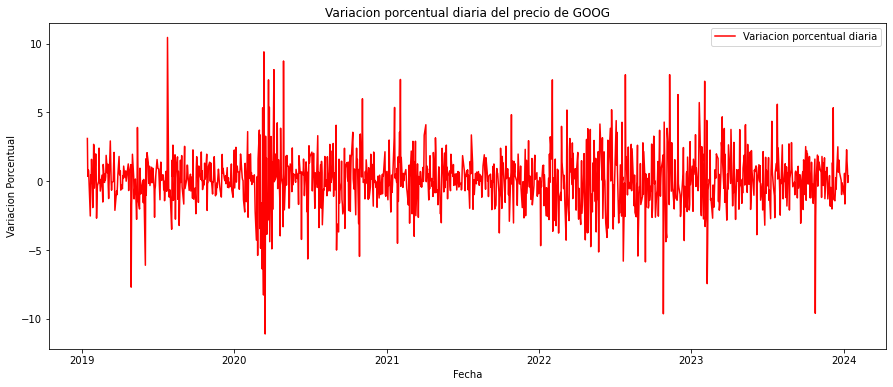

In [13]:
#Anlicemos la variacion porcentual diaria de GOOG
goog_h=goog.history("5y")
#Cálculo de la variación porcentual diaria con dividendos:
goog_h['Retorno Porcentual'] = ((goog_h['Close'] - goog_h['Close'].shift(1)) / goog_h['Close'].shift(1) * 100) + goog_h['Dividends']
goog_h

#graficamos para visualizar esa variación porcentual diaria a lo largo del tiempo
plt.figure(figsize=(15, 6))
plt.plot(goog_h.index, goog_h['Retorno Porcentual'], label='Variacion porcentual diaria', color='red')
plt.title('Variacion porcentual diaria del precio de GOOG')
plt.xlabel('Fecha')
plt.ylabel('Variacion Porcentual')
plt.legend()
plt.show()

Análisis: Los precios tienden a retornar hacia la media con fluctuaciones no tan drásticas, salvo en los momentos de la pandemia, donde se observan oscilaciones más notables. Este comportamiento es consistente con lo que suele observarse en procesos estocásticos, y podría proporcionar una descripción adecuada para el comportamiento de las tres series temporales.